This notebooks is composed of 3 sections corresponding to the analysis of the following data:
- Comparison of treatments with photons, protons and carbon ions: Single-field irradiations of liver tumor
- Impact of multi-field irradiations with photons (liver tumor): Comparison of your result with the whole set of data gathered in the online spreadsheet
- Impact of patient positioning uncertainties (head tumor)

Data files are provided so that the notebook can be run. Do not forget to change de names of the data files in the notebook according to the name you chose when you saved the files.

# Section 1 : Comparison of treatments with photons, protons and carbon ions: Single-field irradiations

In [1]:
import functions as f

In [2]:
# Data
datafile = 'Photons'
#datafile = 'Protons'
#datafile = 'Carbon'

#datafile = 'Photons5angEquiCouch90'
#datafile = 'Photons5angEquiCouch0'

# Extension
file = datafile + '.fig' 

In [3]:
# Treatment of the tumor in the liver
NumberOfFractions = 30
TotalPrescribedDose = 45 # Gy (over the whole treatment)
TotalDoseMaxInOAR = 25 # Gy (over the whole treatment)
PrescribedDose = TotalPrescribedDose/NumberOfFractions
DoseMaxInOAR = TotalDoseMaxInOAR/NumberOfFractions

TumorDoseTolerance = 5 # %

print(f'Prescribed dose in tunor: {PrescribedDose:.2f} Gy')
print(f'Maximal dose in organ at risk: {DoseMaxInOAR:.2f} Gy')

Prescribed dose in tunor: 1.50 Gy
Maximal dose in organ at risk: 0.83 Gy


In [4]:
# Organs
keys = ['PTV', 'CTV', 'GTV', 'Kidney_R', 'Stomach', 'SmallBowel', 'LargeBowel', 'Celiac', 'Liver', 
        'Heart', 'SpinalCord', 'duodenum', 'Skin']

# Extract all data from matrad file 
MyKeys, data = f.extract(file, keys)

# Calculate the figures of merit of the treatment

DoseMinVolume_Tumor = f.Tumor_DoseMinVolume(data, '-PTV', PrescribedDose* (100-TumorDoseTolerance)/100)
DoseMaxVolume_Liver = f.OAR_DoseMaxVolume(data, 'Liver', DoseMaxInOAR)
DoseMaxVolume_Heart = f.OAR_DoseMaxVolume(data, 'Heart', DoseMaxInOAR)
#DoseMaxVolume_Spinal = f.OAR_DoseMaxVolume(data, 'SpinalCord', DoseMaxInOAR)

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


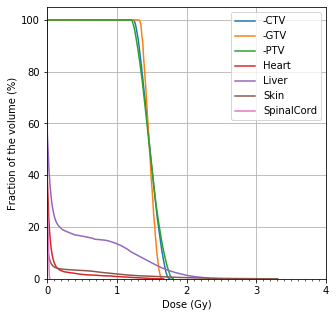

In [5]:
# Plot the HDV
# The figure is saved with the same name as the one of the data file + .png
MyKeys.sort()

MaxDoseDisplay = 4 # Gy
f.plot_AllHDV(data, MyKeys, MaxDoseDisplay, datafile)

In [6]:
# Data to be reported

print(f'Fraction of the tumor volume with less than 95% of the prescribed dose : {DoseMinVolume_Tumor:.2f} %')

print(f'Fraction of the volume with maximal dose (Liver) : {DoseMaxVolume_Liver:.2f} %')
print(f'Fraction of the volume with maximal dose (Heart) : {DoseMaxVolume_Heart:.2f} %')
print(f'Sum of these fractions : {DoseMinVolume_Tumor+DoseMaxVolume_Liver+DoseMaxVolume_Heart:.2f} %')
#print(f'Fraction of the volume with maximal dose (Spinal chord) : {DoseMaxVolume_Spinal:.2f} %')

Fraction of the tumor volume with less than 95% of the prescribed dose : 38.67 %
Fraction of the volume with maximal dose (Liver) : 14.92 %
Fraction of the volume with maximal dose (Heart) : 1.14 %
Sum of these fractions : 54.73 %


# Section 2 : Impact of multi-field irradiations with photons (liver tumor)

## 5 equidistant angles

In [15]:
# Data for the following Gantry angles:  0 72 144 216 288
datafile = 'Photons5angEquiCouch0'

# Extension
file = datafile + '.fig' 

In [16]:
# Organs
keys = ['PTV', 'CTV', 'GTV', 'Kidney_R', 'Stomach', 'SmallBowel', 'LargeBowel', 'Celiac', 'Liver', 
        'Heart', 'SpinalCord', 'duodenum', 'Skin']

# Extract all data from matrad file 
MyKeys, data = f.extract(file, keys)

# Calculate the figures of merit of the treatment

DoseMinVolume_Tumor = f.Tumor_DoseMinVolume(data, '-PTV', PrescribedDose* (100-TumorDoseTolerance)/100)
DoseMaxVolume_Liver = f.OAR_DoseMaxVolume(data, 'Liver', DoseMaxInOAR)
DoseMaxVolume_Heart = f.OAR_DoseMaxVolume(data, 'Heart', DoseMaxInOAR)

print(f'Fraction of the tumor volume with less than 95% of the prescribed dose : {DoseMinVolume_Tumor:.2f} %')

print(f'Fraction of the volume with maximal dose (Liver) : {DoseMaxVolume_Liver:.2f} %')
print(f'Fraction of the volume with maximal dose (Heart) : {DoseMaxVolume_Heart:.2f} %')
print(f'Sum of these fractions : {DoseMinVolume_Tumor+DoseMaxVolume_Liver+DoseMaxVolume_Heart:.2f} %')

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
Fraction of the tumor volume with less than 95% of the prescribed dose : 2.21 %
Fraction of the volume with maximal dose (Liver) : 11.75 %
Fraction of the volume with maximal dose (Heart) : 3.92 %
Sum of these fractions : 17.87 %


## Try your own set of angles!

In [19]:
# Data with your own Gantry angles!
datafile = 'Photons5angEquiCouch0_From45'

# Extension
file = datafile + '.fig' 

In [21]:
# Organs
keys = ['PTV', 'CTV', 'GTV', 'Kidney_R', 'Stomach', 'SmallBowel', 'LargeBowel', 'Celiac', 'Liver', 
        'Heart', 'SpinalCord', 'duodenum', 'Skin']

# Extract all data from matrad file 
MyKeys, data = f.extract(file, keys)

# Calculate the figures of merit of the treatment

DoseMinVolume_Tumor = f.Tumor_DoseMinVolume(data, '-PTV', PrescribedDose* (100-TumorDoseTolerance)/100)
DoseMaxVolume_Liver = f.OAR_DoseMaxVolume(data, 'Liver', DoseMaxInOAR)
DoseMaxVolume_Heart = f.OAR_DoseMaxVolume(data, 'Heart', DoseMaxInOAR)

print(f'Fraction of the tumor volume with less than 95% of the prescribed dose : {DoseMinVolume_Tumor:.2f} %')

print(f'Fraction of the volume with maximal dose (Liver) : {DoseMaxVolume_Liver:.2f} %')
print(f'Fraction of the volume with maximal dose (Heart) : {DoseMaxVolume_Heart:.2f} %')
print(f'Sum of these fractions : {DoseMinVolume_Tumor+DoseMaxVolume_Liver+DoseMaxVolume_Heart:.2f} %')

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
Fraction of the tumor volume with less than 95% of the prescribed dose : 2.21 %
Fraction of the volume with maximal dose (Liver) : 11.92 %
Fraction of the volume with maximal dose (Heart) : 3.61 %
Sum of these fractions : 17.73 %


Please report the various fractions you obtained in the online spread sheet :
https://lite.framacalc.org/masterclass-9zpo

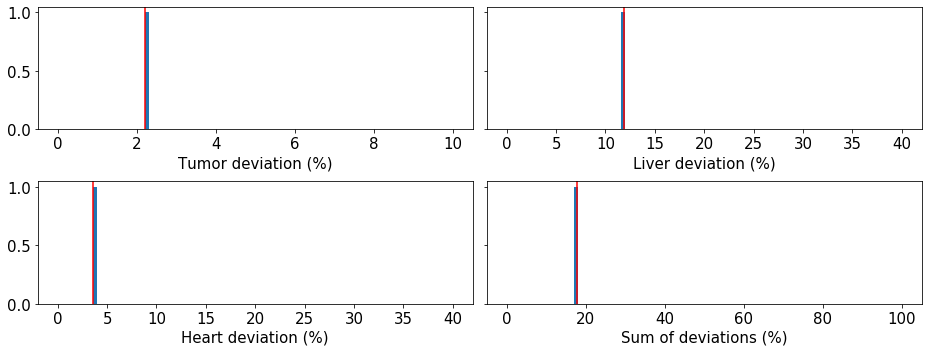

In [23]:
# Histograms of the whole set of data gathered in the online spreadsheet

import csv
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from collections import defaultdict

# Read the data sheet with the whole set of data 
framacalc_url = "https://lite.framacalc.org/masterclass-9zpo"

download = requests.get(framacalc_url + ".csv").content.decode("utf-8")
#csv_data = csv.reader(download.splitlines(), delimiter=",")

columns = defaultdict(list) # each value in each column is appended to a list

reader = csv.DictReader(download.splitlines(), delimiter=",") # read rows into a dictionary format

for row in reader: # read a row as {column1: value1, column2: value2,...}
    for (k,v) in row.items(): # go over each column name and value 
            columns[k].append(v) # append the value into the appropriate list
                                 # based on column name k
                
fig, axs = plt.subplots(2, 2, sharey=True, tight_layout=True)
fig.set_size_inches(13, 5)

# Parameters of the histograms
n_bins = 100
xmax_tumor = 10
xmax_OAR = 40
xmax_sum = 100

# Histograms
junk = axs[0,0].hist((np.array(columns['Tumor deviation'])).astype(np.float64),  bins=n_bins, range=[0, xmax_tumor])
junk = axs[0,1].hist((np.array(columns['Liver deviation'])).astype(np.float64), bins=n_bins, range=[0, xmax_OAR])
junk = axs[1,0].hist((np.array(columns['Heart deviation'])).astype(np.float64), bins=n_bins, range=[0, xmax_OAR])
junk = axs[1,1].hist((np.array(columns['Sum of deviations'])).astype(np.float64), bins=n_bins, range=[0, xmax_sum])

axs[0,0].set_xlabel('Tumor deviation (%)')
axs[0,1].set_xlabel('Liver deviation (%)')
axs[1,0].set_xlabel('Heart deviation (%)')
axs[1,1].set_xlabel('Sum of deviations (%)')


axs[0,0].axvline(DoseMinVolume_Tumor,color = 'r')
axs[0,1].axvline(DoseMaxVolume_Liver,color = 'r')
axs[1,0].axvline(DoseMaxVolume_Heart,color = 'r')
axs[1,1].axvline(DoseMinVolume_Tumor+DoseMaxVolume_Liver+DoseMaxVolume_Heart,color = 'r')




# Section 3: Impact of patient positioning uncertainties (head tumor)

In [25]:
# Data
datafile = 'ALDERSON_Protons0-60-240'
#datafile = 'ALDERSON_Protons0-60-240_shift'

# Extension
file = datafile + '.fig' 

In [26]:
# Treatment of the tumor in the liver
NumberOfFractions = 30
TotalPrescribedDose = 60 # Gy (over the whole treatment)
TotalDoseMaxInOAR1 = 20 # Gy (Brainstem)
TotalDoseMaxInOAR2 = 30 # Gy (Temp)
PrescribedDose = TotalPrescribedDose/NumberOfFractions
DoseMaxInOAR1 = TotalDoseMaxInOAR1/NumberOfFractions
DoseMaxInOAR2 = TotalDoseMaxInOAR2/NumberOfFractions

TumorDoseTolerance = 5 # %

print(f'Prescribed dose in tunor: {PrescribedDose:.2f} Gy')
print(f'Maximal dose in OAR1: {DoseMaxInOAR1:.2f} Gy')
print(f'Maximal dose in OAR2: {DoseMaxInOAR2:.2f} Gy')

Prescribed dose in tunor: 2.00 Gy
Maximal dose in OAR1: 0.67 Gy
Maximal dose in OAR2: 1.00 Gy


In [27]:
# Organs
keys = ['PTV', 'CTV', 'GTV', 'Skin','Eye(L)', 'Eye(R)', 'Opticus(L)', 'Opticus(R)', 'Chiasma', 
        'Brainstem', 'Cord', 'Temp(R)', 'Temp(L)']

# Extract all data from matrad file 
MyKeys, data = f.extract(file, keys)

# Calculate the figures of merit of the treatment

DoseMinVolume_Tumor = f.Tumor_DoseMinVolume(data, '-PTV', PrescribedDose* (100-TumorDoseTolerance)/100)
DoseMaxVolume_OAR1 = f.OAR_DoseMaxVolume(data, 'Brainstem', DoseMaxInOAR1)
DoseMaxVolume_OAR2 = f.OAR_DoseMaxVolume(data, 'Temp(L)', DoseMaxInOAR2)

index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0


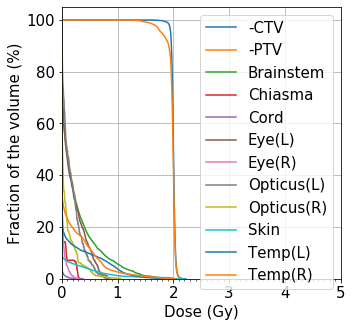

In [28]:
# Plot the HDV
# The figure is saved with the same name as the one of the data file + .png
MyKeys.sort()

MaxDoseDisplay = 5 # Gy
f.plot_AllHDV(data, MyKeys, MaxDoseDisplay, datafile)

In [29]:
# Data to be reported

print(f'Fraction of the tumor volume with less than 95% of the prescribed dose : {DoseMinVolume_Tumor:.2f} %')

print(f'Fraction of the volume with maximal dose (OAR1) : {DoseMaxVolume_OAR1:.2f} %')
print(f'Fraction of the volume with maximal dose (OAR2) : {DoseMaxVolume_OAR2:.2f} %')

Fraction of the tumor volume with less than 95% of the prescribed dose : 8.69 %
Fraction of the volume with maximal dose (OAR1) : 11.37 %
Fraction of the volume with maximal dose (OAR2) : 3.82 %
